In [12]:
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import
from future import standard_library
standard_library.install_aliases()
import argparse
import os

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def errorfill(x, y, yerr, color=None, alpha_fill=0.3, ax=None, label=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = next(ax._get_lines.prop_cycler)['color']
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color, label=label)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)

def plot_scores(files, labels, title):
    for fpath, label in zip(files, labels):
        if os.path.isdir(fpath):
            fpath = os.path.join(fpath, 'scores.txt')
        assert os.path.exists(fpath)
        scores = pd.read_csv(fpath, delimiter='\t')
        # plt.plot(scores['steps'], scores['mean'], label=label)
        # plt.plot(scores['steps'], scores['mean'], label=label)
        # plt.fill_between(scores['steps'], -scores['stdev'], scores['stdev'], alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF', linewidth=4, linestyle='dashdot', antialiased=True)
        errorfill(scores['steps'], scores['mean'], scores['stdev'], label=label)

    plt.xlabel('steps')
    plt.ylabel('score')
    plt.legend(loc='best')
    if title:
        plt.title(title)

    fig_fname = title + '.png'
    plt.show()
    plt.savefig(fig_fname)
    print('Saved a figure as {}'.format(fig_fname))

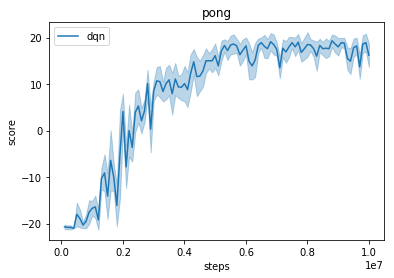

Saved a figure as pong.png


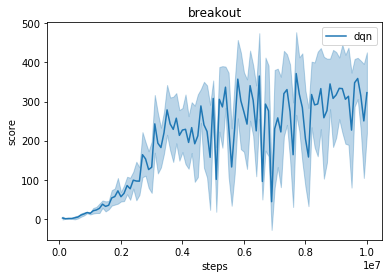

Saved a figure as breakout.png


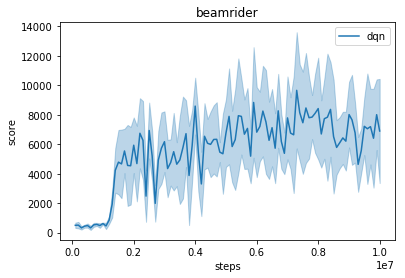

Saved a figure as beamrider.png


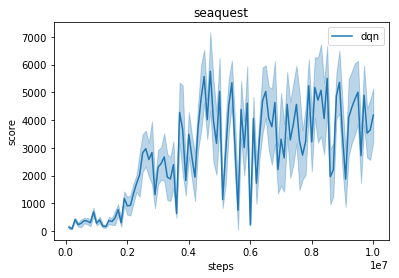

Saved a figure as seaquest.png


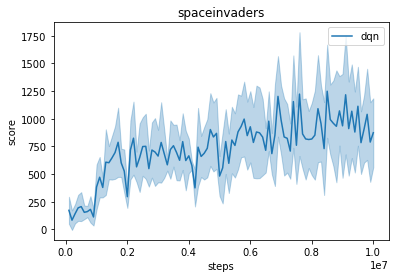

Saved a figure as spaceinvaders.png


In [14]:
plot_scores(['pong/20170729T002505.180328/scores.txt'], ['dqn'], title='pong')
plot_scores(['breakout/20170726T212134.210326/scores.txt'], ['dqn'], title='breakout')
plot_scores(['beamrider/20170728T220737.724648/scores.txt'], ['dqn'], title='beamrider')
plot_scores(['seaquest/20170729T002437.594523/scores.txt'], ['dqn'], title='seaquest')
plot_scores(['spaceinvaders/20170728T221316.351960/scores.txt'], ['dqn'], title='spaceinvaders')